# Splipy

## The basics

Using splipy will have you interacting with three main classes: Curve, Surface and Volume and an associated factory class to each of these. The usual production line is to create curves and from these form surfaces which can finally be comined into volumes. 

The reccomended way of importing splipy is using the sp abreviation. You will also find it useful to import numpy as this is used as the primary storage containers for input and output data.




In [1]:
import splipy as sp
import numpy as np

After this, one can create primitive objects directly.

In [2]:
curve = sp.Curve()   # creates the default linear curve going from (0,0) to (1,0)
surf  = sp.Surface() # creates the default surface: the unit square (0,1)x(0,1)
vol   = sp.Volume()  # default volume is the unit cube (0,1)x(0,1)x(0,1)

print(curve)         # prints the B-spline basis (knot vector) and controlpoints of the curve

p=2, [ 0.  0.  1.  1.]
[[ 0.  0.]
 [ 1.  0.]]


You can also specify the knot vector, polynomial order and knot vectors of your objects directly, giving you low-level control of the spline objects

In [3]:
basis = sp.BSplineBasis(order=4, knots=[0,0,0,0,1,2,2,2,2]) # cubic knot vector with one internal C2 knot
controlpoints = [[0,0],[1.5,0.2],[1,1],[0.5,0.2],[2,0]]

curve = sp.Curve(basis, controlpoints)

print(curve)

p=4, [ 0.  0.  0.  0.  1.  2.  2.  2.  2.]
[[ 0.   0. ]
 [ 1.5  0.2]
 [ 1.   1. ]
 [ 0.5  0.2]
 [ 2.   0. ]]


These are parametric maps which means that you can evaluate a curve for any parametric point t in its domain. This domain is given by the knot vector, and would be (0,2) in the case above. Evaluating a curve can be done by the ()-operator

In [4]:
x = curve(0.0) # evaluates curve at the starting point
print(x)       # prints the (x,y)-coordinate of this evaluation

[ 0.  0.]


In [5]:
x = curve(0.1) # evaluates curve near the starting point
print(x)

[ 0.39925  0.0654 ]


Creating a vector of evaluating points will give back a matrix of all coordinates at all evaluation points

In [6]:
t = np.linspace(0,2,10) # 10 uniformly spaced points between 0 and 2
x = curve(t)            # evaluate the curve at all of these points
print(x)

[[ 0.          0.        ]
 [ 0.75994513  0.1563786 ]
 [ 1.11659808  0.33251029]
 [ 1.18518519  0.48888889]
 [ 1.08093278  0.58600823]
 [ 0.91906722  0.58600823]
 [ 0.81481481  0.48888889]
 [ 0.88340192  0.33251029]
 [ 1.24005487  0.1563786 ]
 [ 2.          0.        ]]


We can plot this curve using matplotlib

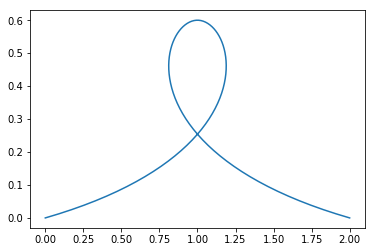

In [7]:
import matplotlib.pyplot as plt

t = np.linspace(0,2,100)   # 100 evaluation points (our plotting resolution)
x = curve(t)
plt.plot(x[:,0], x[:,1])   # plot (x,y)-coordinates
plt.show()

One can also show the control-points directly

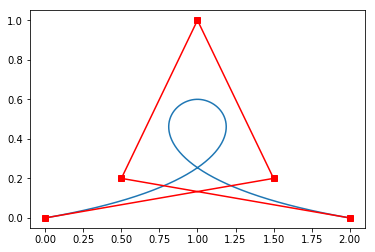

In [8]:
plt.plot(x[:,0], x[:,1])                                            # actual curve is shown in blue
plt.plot(curve.controlpoints[:,0], curve.controlpoints[:,1], 'rs-') # control-polygon is shown in red
plt.show()

The controlpoints are available as a class variable in Curve (and Surface/Volume), but can also be accessed through square brackets [].

In [9]:
print(curve[1]) # prints the second controlpoint (these are 0-indexed)
print(curve(1)) # prints the curve evaluated at the point t=1.0

[ 1.5  0.2]
[ 1.   0.6]


Bivariate (surfaces) and trivariate (volumes) follow the same construction by using parantheses as evaluations and square brackets as control-points. They can also be constructed from a low-level by specifying knot vectors and controlpoints manually.

In [10]:
basis = sp.BSplineBasis(3, [0,0,0,1,1,1]) # quadratic basis on the domain (0,1) with no internal knots
controlpoints = [[0,0,0],   [1,0,1], [2,0,0],
                 [0.5,1,0], [1,1,2], [1.5,1,0],
                 [0,2,0],   [1,2,1], [2,2,0]] # control-net of 3x3 points, each consisting of (x,y,z)-coordinate
surface = sp.Surface(basis,basis, controlpoints)
print(surface)

p=3, [ 0.  0.  0.  1.  1.  1.]
p=3, [ 0.  0.  0.  1.  1.  1.]
[ 0.  0.  0.]
[ 1.  0.  1.]
[ 2.  0.  0.]
[ 0.5  1.   0. ]
[ 1.  1.  2.]
[ 1.5  1.   0. ]
[ 0.  2.  0.]
[ 1.  2.  1.]
[ 2.  2.  0.]



In [11]:
print(surface[1]) # prints the second controlpoint (flat indexing)

[ 1.  0.  1.]


In [12]:
print(surface[1,0]) # prints controlpoint (1,0) using tensor-product indexing

[ 1.  0.  1.]


In [13]:
print(surface[0,1])
print(surface[3])   # This is referencing the same controlpoint using single-indexing

[ 0.5  1.   0. ]
[ 0.5  1.   0. ]


In [14]:
print(surface(0.123, 0.23)) # evaluates the surface at a given parametric (u,v) point

[ 0.3795334   0.46        0.29215782]


Note that this is a surface-patch embedded in 3-dimensional space, meaning we evaluate it using 2 coordinates, and the result is given by 3 coordinates.

In [15]:
u = np.linspace(0,1,30) # uniformly spaced list of 30 points on the parametric (u-)domain of the surface: (0,1)
v = np.linspace(0,1,30) # uniformly spaced list of 30 points on the parametric (v-)domain of the surface: (0,1)
x = surface(u,v)        # x is 30x30 evaluation points, each of (x,y,z)-coordinate
print(x.shape)

(30, 30, 3)


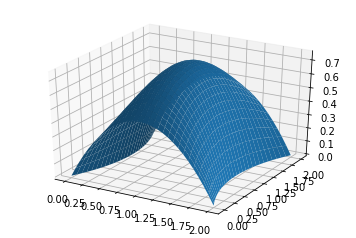

In [16]:
# first we set up our 3D plotting environment
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the (x,y,z)-coordinates of the surface
ax.plot_surface(x[:,:,0], x[:,:,1], x[:,:,2])
plt.show()

## Manipulation of objects

Elementary operations, such as translation and rotation of objects can be applied to objects directly without having to go through controlpoints. The complete list of elementary operations is the following

### Translation

In [17]:
curve.translate([1.0, 0.0]) # moves the curve object 1 unit in the x-direction
curve += [1,0]              # does the exact same thing
curve2 = curve + [1,0]      # returns a new curve, which is the translation of the old

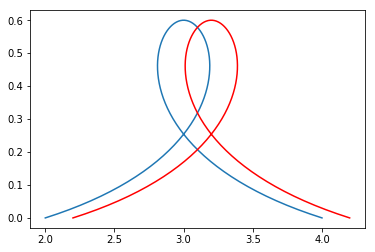

In [18]:
plt.plot(curve(t)[:,0], curve(t)[:,1])       # plot the entire curve (in blue)
curve += (0.2, 0)                            # move the curve 0.2 units in positive x-direction
plt.plot(curve(t)[:,0], curve(t)[:,1], 'r-') # plot the entire curve (in red)
plt.show()

### Scaling

Note: Scaling always happens relative to the coordinate origin, often causing unwanted translation if you are not careful. A useful method is center() which will fetch the center-of-mass of the current object and can be used to place objects around the origin

In [19]:
curve -= curve.center() # moves (translates) the curve so the center of mass is at the origin
curve.scale(2.0)        # doubles the size of the curve
curve *= 2.0            # does the exact same thing
curve *= (2,1)          # scales twice in x-direction, while keeping the y-direction unchanged

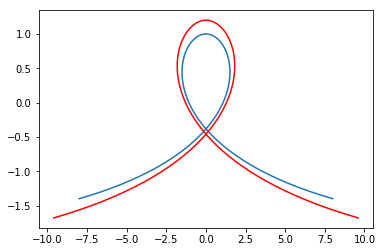

In [20]:
plt.plot(curve(t)[:,0], curve(t)[:,1])       # plot the entire curve (in blue)
curve *= 1.2                                 # scales the curve 20% in all directions
plt.plot(curve(t)[:,0], curve(t)[:,1], 'r-') # plot the entire curve (in red)
plt.show()

### Rotation

Rotation is also always done in reference to the origin. For now, the curve is already centered, so no need to do it twice.

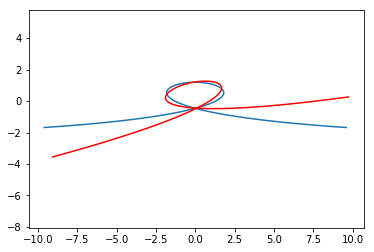

In [21]:
plt.plot(curve(t)[:,0], curve(t)[:,1])       # plot the entire curve (in blue)
curve.rotate(0.2)                            # rotate the curve 0.2 radians
plt.plot(curve(t)[:,0], curve(t)[:,1], 'r-') # plot the entire curve (in red)
plt.axis('equal')
plt.show()

## Factory methods

Factory methods are the primary way of creating useful geometries fast. They form an abstraction level up from knot vectors and control-points to give a cleaner simpler interface. The factory methods need to be imported.

In [22]:
import splipy.curve_factory as curve_factory
import splipy.surface_factory as surface_factory
import splipy.volume_factory as volume_factory

### Curves

The traditional construction technique is to start bottoms up and create curves. Surfaces are then created by the manipulation of curves, and finally volumes from the manipulation of surfaces.

#### Circle

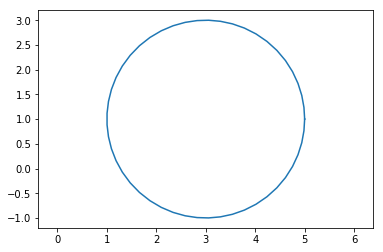

In [23]:
curve = curve_factory.circle(r=2) + [3,1]       # circle of radius 2 centered at (3,1)
t = np.linspace(curve.start(), curve.end(), 50) # 50 uniform evaluation points on the parametric domain of the curve
x = curve(t)                                    # evaluate curve to get (x,y)-coordinates
plt.plot(x[:,0], x[:,1])                        # plot curve
plt.axis('equal')                               # no scaling of x and y-axis during plotting
plt.show()

#### Lines and polygons

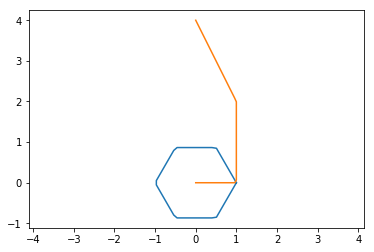

In [24]:
# create a hexagon (6 sides) around the origin
crv1 = curve_factory.n_gon(6)
t = np.linspace(crv1.start(), crv1.end(), 50)
x = crv1(t)
plt.plot(x[:,0], x[:,1])

# create a piecewise linear polygon through a list of points
crv2 = curve_factory.polygon([[0,0], [1,0], [1,1], [1,2], [0,4]])
t = np.linspace(crv2.start(), crv2.end(), 50)
x = crv2(t)
plt.plot(x[:,0], x[:,1])

plt.axis('equal')
plt.show()

#### Point-cloud fitting

In [25]:
# generate a set of (x,y)-points to fit
t = np.linspace(0,2*np.pi,600)
x = np.array([t, np.sin(t)])

To interpolate the data, we may use cubic interpolation

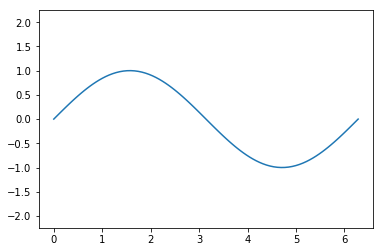

In [26]:
curve = curve_factory.cubic_curve(x.T)           # perform interpolation
u = np.linspace(curve.start(), curve.end(), 100) # 100 uniform visualization points
plt.plot(curve(u)[:,0], curve(u)[:,1])           # plot curve
plt.axis('equal')                                # no scaling of x and y-axis during plotting
plt.show()

In [27]:
print(x.shape)      # dataset of 600 points
print(curve.shape)  # spline curve (interpolated curve) have 600 controlpoints

(2, 600)
(600,)


To approximate the curve, we may use a least-square fit

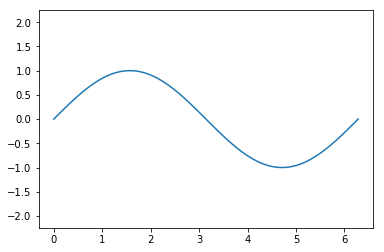

In [28]:
basis = sp.BSplineBasis(4, [0,0,0,0,1,2,3,4,5,6,7,8,9,10,10,10,10]) # approximation basis (cubic spline)
curve = curve_factory.least_square_fit(x.T, basis, t/2.0/np.pi*10) # perform approximation
u = np.linspace(curve.start(), curve.end(), 100)      # 100 uniform visualization points
plt.plot(curve(u)[:,0], curve(u)[:,1])                # plot curve
plt.axis('equal')                                     # no scaling of x and y-axis during plotting
plt.show()

In [29]:
print(x.shape)     # dataset of 600 points
print(curve.shape) # approximated curve has 13 controlpoints

(2, 600)
(13,)


### Surfaces

#### Disc

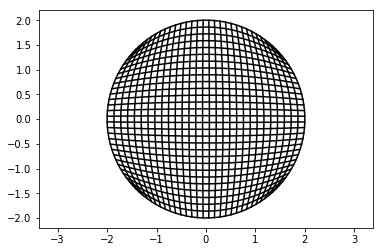

In [30]:
surf = surface_factory.disc(r=2, type='square')
u = np.linspace(surf.start(0), surf.end(0), 30)
v = np.linspace(surf.start(1), surf.end(1), 30)
x = surf(u,v)
plt.plot(x[:,:,0], x[:,:,1], 'k-')
plt.plot(x[:,:,0].T, x[:,:,1].T, 'k-')
plt.axis('equal')
plt.show()

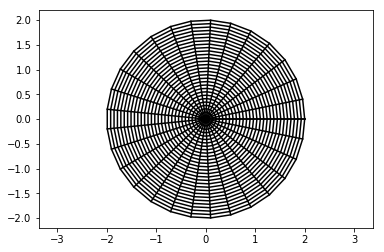

In [31]:
surf = surface_factory.disc(r=2, type='radial')
u = np.linspace(surf.start(0), surf.end(0), 30)
v = np.linspace(surf.start(1), surf.end(1), 30)
x = surf(u,v)
plt.plot(x[:,:,0], x[:,:,1], 'k-')
plt.plot(x[:,:,0].T, x[:,:,1].T, 'k-')
plt.axis('equal')
plt.show()

#### Torus

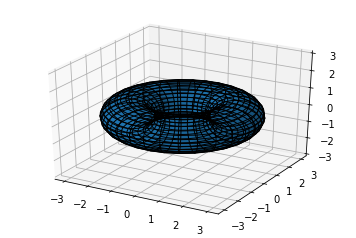

In [39]:
surf = surface_factory.torus(minor_r=1, major_r=2)

u = np.linspace(surf.start(0), surf.end(0), 30)
v = np.linspace(surf.start(1), surf.end(1), 30)
x = surf(u,v)

ax = plt.figure().add_subplot(111, projection='3d')
ax.plot_surface(x[:,:,0], x[:,:,1], x[:,:,2])
ax.plot_wireframe(x[:,:,0], x[:,:,1], x[:,:,2], edgecolor='k', linewidth=1)
ax.set_zlim3d(-3,3)
plt.show()